Computes geostrophic velocities

In [1]:
import xarray as xr
import cmocean
from xnemogcm import open_nemo_and_domain_cfg, open_domain_cfg, get_metrics
import xgcm
import numpy as np

----------------------------------------------

In [2]:
directory = '/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP16/production/OUTPUTS/'
nemo_files = ['MINT_1d_00700601_00700630_grid_T.nc']

mask_path = ['~/Python/AI4PEX/DINO/mesh_mask_exp16.nc']

In [3]:
nemo_paths = [directory + f for f in nemo_files]
ds = open_nemo_and_domain_cfg(nemo_files=nemo_paths,
                              domcfg_files=mask_path)

/home/users/twilder/Python/pyCDFTOOLS/lib/python3.12/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


In [58]:
ds

<xarray.Dataset>
Dimensions:              (z_c: 36, axis_nbounds: 2, t: 30, y_c: 3183, x_c: 802,
                          x_f: 802, y_f: 3183, z_f: 36)
Coordinates: (12/20)
    time_instant         (t) object dask.array<chunksize=(1,), meta=np.ndarray>
  * t                    (t) object 0070-06-02 00:00:00 ... 0070-07-01 00:00:00
  * x_c                  (x_c) int64 0 1 2 3 4 5 6 ... 796 797 798 799 800 801
  * y_c                  (y_c) int64 0 1 2 3 4 5 ... 3178 3179 3180 3181 3182
    gdept_1d             (z_c) float64 dask.array<chunksize=(1,), meta=np.ndarray>
  * z_c                  (z_c) int64 0 1 2 3 4 5 6 7 ... 28 29 30 31 32 33 34 35
    ...                   ...
    gphif                (y_f, x_f) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
    gdepw_1d             (z_f) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    gdepw_0              (z_f, y_c, x_c) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
  * x_f                  (x_f) float64 0.5 1.5 2.5 3.5 ... 799.5 800.5 801.5
  * y_f                  (y_f) float64 0.5 1.5 2.5 ... 3.182e+03 3.182e+03
  * z_f                  (z_f) float64 -0.5 0.5 1.5 2.5 ... 31.5 32.5 33.5 34.5
Dimensions without coordinates: axis_nbounds
Data variables: (12/34)
    deptht_bounds        (z_c, axis_nbounds) float32 dask.array<chunksize=(36, 2), meta=np.ndarray>
    time_instant_bounds  (t, axis_nbounds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    t_bounds             (t, axis_nbounds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    thetao               (t, z_c, y_c, x_c) float32 dask.array<chunksize=(1, 36, 3183, 802), meta=np.ndarray>
    so                   (t, z_c, y_c, x_c) float32 dask.array<chunksize=(1, 36, 3183, 802), meta=np.ndarray>
    zos                  (t, y_c, x_c) float32 dask.array<chunksize=(1, 3183, 802), meta=np.ndarray>
    ...                   ...
    e3u_0                (z_c, y_c, x_f) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    e3v_0                (z_c, y_f, x_c) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    e3f_0                (z_c, y_f, x_f) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    e3w_0                (z_f, y_c, x_c) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    e3uw_0               (z_f, y_c, x_f) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    e3vw_0               (z_f, y_f, x_c) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
Attributes: (12/15)
    name:         NEMO dataset
    description:  Ocean grid variables, set on the proper positions
    title:        Ocean grid variables
    Conventions:  CF-1.6
    timeStamp:    2026-Jan-08 11:06:30 GMT
    uuid:         5eb25a8e-4422-4e9f-9c62-873508f95944
    ...           ...
    Jperio:       0
    NFold:        0
    NFtype:       -
    VertCoord:    zco
    IsfCav:       0
    TimeStamp:    21/12/2025 08:05:25 +0000

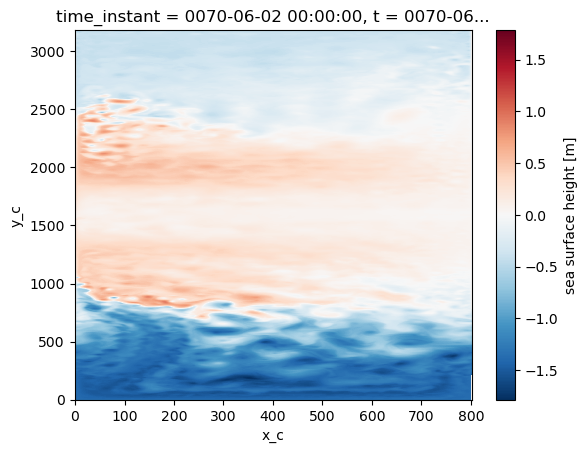

In [5]:
ds.zos.isel(t=0).plot()

In [4]:
ds_ss = ds.isel(z_c=slice(0,2), z_f=slice(0,2))
ds_ss

<xarray.Dataset>
Dimensions:              (z_c: 2, axis_nbounds: 2, t: 30, y_c: 3183, x_c: 802,
                          x_f: 802, y_f: 3183, z_f: 2)
Coordinates: (12/20)
    time_instant         (t) object dask.array<chunksize=(1,), meta=np.ndarray>
  * t                    (t) object 0070-06-02 00:00:00 ... 0070-07-01 00:00:00
  * x_c                  (x_c) int64 0 1 2 3 4 5 6 ... 796 797 798 799 800 801
  * y_c                  (y_c) int64 0 1 2 3 4 5 ... 3178 3179 3180 3181 3182
    gdept_1d             (z_c) float64 dask.array<chunksize=(1,), meta=np.ndarray>
  * z_c                  (z_c) int64 0 1
    ...                   ...
    gphif                (y_f, x_f) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
    gdepw_1d             (z_f) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    gdepw_0              (z_f, y_c, x_c) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
  * x_f                  (x_f) float64 0.5 1.5 2.5 3.5 ... 799.5 800.5 801.5
  * y_f                  (y_f) float64 0.5 1.5 2.5 ... 3.182e+03 3.182e+03
  * z_f                  (z_f) float64 -0.5 0.5
Dimensions without coordinates: axis_nbounds
Data variables: (12/34)
    deptht_bounds        (z_c, axis_nbounds) float32 dask.array<chunksize=(2, 2), meta=np.ndarray>
    time_instant_bounds  (t, axis_nbounds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    t_bounds             (t, axis_nbounds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    thetao               (t, z_c, y_c, x_c) float32 dask.array<chunksize=(1, 2, 3183, 802), meta=np.ndarray>
    so                   (t, z_c, y_c, x_c) float32 dask.array<chunksize=(1, 2, 3183, 802), meta=np.ndarray>
    zos                  (t, y_c, x_c) float32 dask.array<chunksize=(1, 3183, 802), meta=np.ndarray>
    ...                   ...
    e3u_0                (z_c, y_c, x_f) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    e3v_0                (z_c, y_f, x_c) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    e3f_0                (z_c, y_f, x_f) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    e3w_0                (z_f, y_c, x_c) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    e3uw_0               (z_f, y_c, x_f) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    e3vw_0               (z_f, y_f, x_c) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
Attributes: (12/15)
    name:         NEMO dataset
    description:  Ocean grid variables, set on the proper positions
    title:        Ocean grid variables
    Conventions:  CF-1.6
    timeStamp:    2026-Jan-08 11:06:30 GMT
    uuid:         5eb25a8e-4422-4e9f-9c62-873508f95944
    ...           ...
    Jperio:       0
    NFold:        0
    NFtype:       -
    VertCoord:    zco
    IsfCav:       0
    TimeStamp:    21/12/2025 08:05:25 +0000

Set up xgcm grid

In [14]:
grid = xgcm.Grid(ds_ss, 
                 metrics=get_metrics(ds_ss), 
                 periodic={'X': True, 'Y': False},
                 boundary={'Y': 'extend'},
                )
# bd = {'boundary': 'extend', 'fill_value': 0} #, 'fill_value': 0 fill_value={'Y': 0.0},

Interpolate sea surface height to u grid

In [24]:
zos_u = grid.interp(ds_ss.zos, 'X') * ds.umask.isel(z_c=0)
zos_u
zos_v = grid.interp(ds_ss.zos, 'Y') * ds.vmask.isel(z_c=0)
zos_v

/home/users/twilder/Python/pyCDFTOOLS/lib/python3.12/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(
/home/users/twilder/Python/pyCDFTOOLS/lib/python3.12/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 30
  result = blockwise(
/home/users/twilder/Python/pyCDFTOOLS/lib/python3.12/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(
/home/users/twilder/Python/pyCDFTOOLS/lib/python3.12/site-packages/dask/array/core.py:4836: PerformanceWarning

<xarray.DataArray (t: 30, y_f: 3183, x_c: 802)>
dask.array<mul, shape=(30, 3183, 802), dtype=float32, chunksize=(1, 135, 206), chunktype=numpy.ndarray>
Coordinates:
  * t         (t) object 0070-06-02 00:00:00 ... 0070-07-01 00:00:00
  * x_c       (x_c) int64 0 1 2 3 4 5 6 7 8 ... 794 795 796 797 798 799 800 801
  * y_f       (y_f) float64 0.5 1.5 2.5 3.5 ... 3.18e+03 3.182e+03 3.182e+03
    gdept_1d  float64 dask.array<chunksize=(), meta=np.ndarray>
    z_c       int64 0
    glamv     (y_f, x_c) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
    gphiv     (y_f, x_c) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>

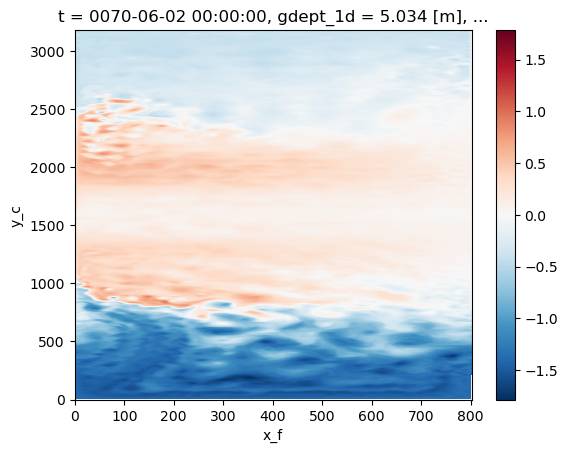

In [26]:
zos_u.isel(t=0).plot()

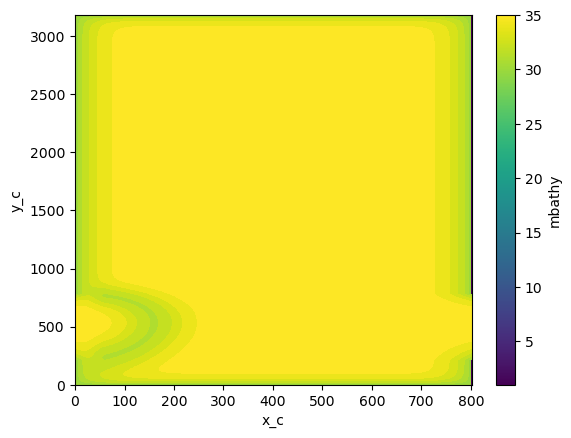

In [12]:
ds.mbathy.plot()

Compute geostrophic velocities

In [35]:
# set coriolis parameter to 1e-12 at equator
ff = xr.where(ds.ff_t<1e-12, 1e-12, ds.ff_t)

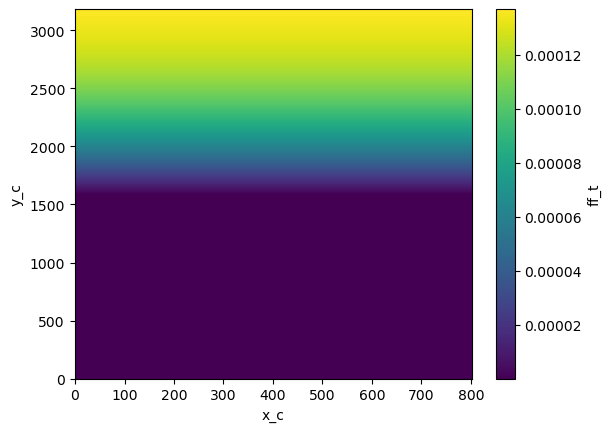

In [36]:
ff.plot()

In [27]:
ug = (- (9.81/(ds.ff_t)) * \
            ( grid.diff(zos_v, 'Y') / ds.e2t ) ) * ds.tmask.isel(z_c=0)
vg = ((9.81/(ds.ff_t)) * \
            ( grid.diff(zos_u, 'X') / ds.e1t ) ) * ds.tmask.isel(z_c=0)

/home/users/twilder/Python/pyCDFTOOLS/lib/python3.12/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(
/home/users/twilder/Python/pyCDFTOOLS/lib/python3.12/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


In [22]:
ug, vg

(<xarray.DataArray (y_c: 3183, x_c: 802, t: 30)>
 dask.array<mul, shape=(3183, 802, 30), dtype=float64, chunksize=(135, 206, 1), chunktype=numpy.ndarray>
 Coordinates:
   * x_c       (x_c) int64 0 1 2 3 4 5 6 7 8 ... 794 795 796 797 798 799 800 801
   * y_c       (y_c) int64 0 1 2 3 4 5 6 7 ... 3176 3177 3178 3179 3180 3181 3182
     glamt     (y_c, x_c) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
     gphit     (y_c, x_c) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
   * t         (t) object 0070-06-02 00:00:00 ... 0070-07-01 00:00:00
     gdept_1d  float64 dask.array<chunksize=(), meta=np.ndarray>
     z_c       int64 0
     gdept_0   (y_c, x_c) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>,
 <xarray.DataArray (y_c: 3183, x_c: 802, t: 30)>
 dask.array<mul, shape=(3183, 802, 30), dtype=float64, chunksize=(135, 206, 1), chunktype=numpy.ndarray>
 Coordinates:
   * x_c       (x_c) int64 0 1 2 3 4 5 6 7 8 ... 794 795 796 797 798 799 800 801
   * y_c 

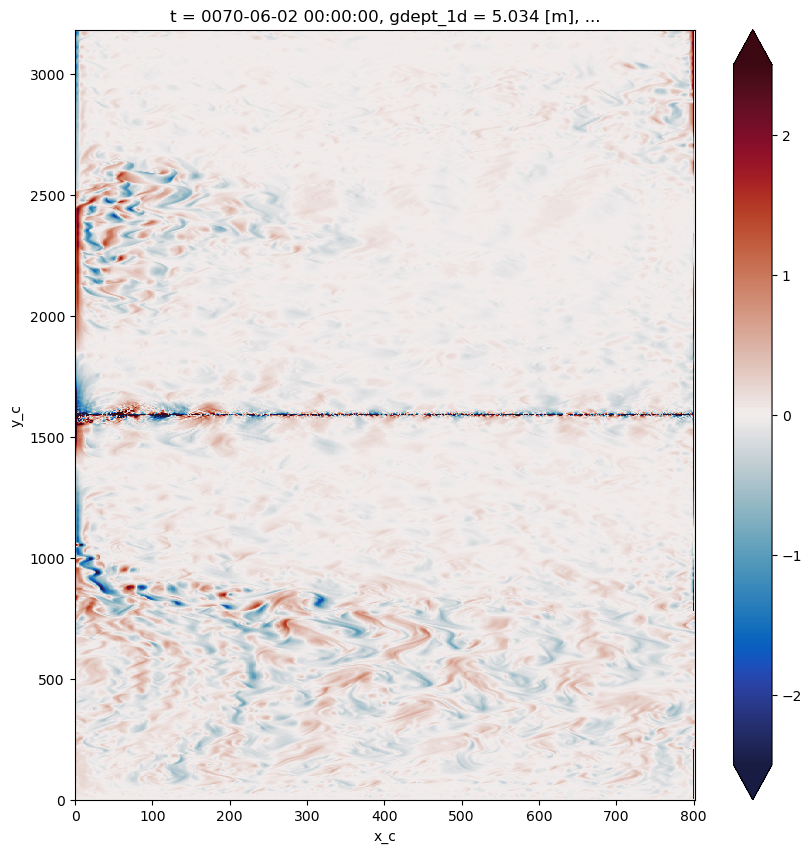

In [28]:
vg.isel(t=0).plot(vmin=-2.5, vmax=2.5,
       figsize=(10,10),
       cmap=cmocean.cm.balance,
       )

In [29]:
vg_v = grid.interp(vg, 'Y') * ds.vmask.isel(z_c=0)
ug_u = grid.interp(ug, 'X') * ds.umask.isel(z_c=0)

/home/users/twilder/Python/pyCDFTOOLS/lib/python3.12/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(
/home/users/twilder/Python/pyCDFTOOLS/lib/python3.12/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


In [18]:
ds.t.values[:-1]

array([cftime.Datetime360Day(70, 6, 2, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(70, 6, 3, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(70, 6, 4, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(70, 6, 5, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(70, 6, 6, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(70, 6, 7, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(70, 6, 8, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(70, 6, 9, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(70, 6, 10, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(70, 6, 11, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(70, 6, 12, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(70, 6, 13, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(70, 6, 14, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(70, 6, 15, 0, 0, 0, 0, has_yea

In [25]:
# create datasets for each velocity
ds_u = xr.Dataset(
    data_vars={
        'ug': (["y", "x", "time_counter"], 
                    ug_u.values),
    },
    coords={
        "time_counter": (["time_counter"], ds_ss.t.values, 
                         ds_ss.t.attrs),
        "gphiu": (["y", "x"], ds_ss.gphiu.values, 
                  {"standard_name": "Latitude", "units": "degrees_north"}),
        "glamu": (["y", "x"], ds_ss.glamu.values, 
                  {"standard_name": "Longitude","units": "degrees_east"}),
    },
    attrs={
        "name": "NEMO dataset",
        "description": "Geostrophic ocean current in i direction \
                          -> ocean U grid variables",
    },
)

Quickly test the streamfunction field

In [31]:
ug_u, vg_v

(<xarray.DataArray (y_c: 3183, x_f: 802, t: 30)>
 dask.array<mul, shape=(3183, 802, 30), dtype=float64, chunksize=(135, 206, 1), chunktype=numpy.ndarray>
 Coordinates:
   * t         (t) object 0070-06-02 00:00:00 ... 0070-07-01 00:00:00
   * y_c       (y_c) int64 0 1 2 3 4 5 6 7 ... 3176 3177 3178 3179 3180 3181 3182
   * x_f       (x_f) float64 0.5 1.5 2.5 3.5 4.5 ... 798.5 799.5 800.5 801.5
     gdept_1d  float64 dask.array<chunksize=(), meta=np.ndarray>
     z_c       int64 0
     glamu     (y_c, x_f) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
     gphiu     (y_c, x_f) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>,
 <xarray.DataArray (y_f: 3183, x_c: 802, t: 30)>
 dask.array<mul, shape=(3183, 802, 30), dtype=float64, chunksize=(135, 206, 1), chunktype=numpy.ndarray>
 Coordinates:
   * t         (t) object 0070-06-02 00:00:00 ... 0070-07-01 00:00:00
   * x_c       (x_c) int64 0 1 2 3 4 5 6 7 8 ... 794 795 796 797 798 799 800 801
   * y_f       (y_f) float6

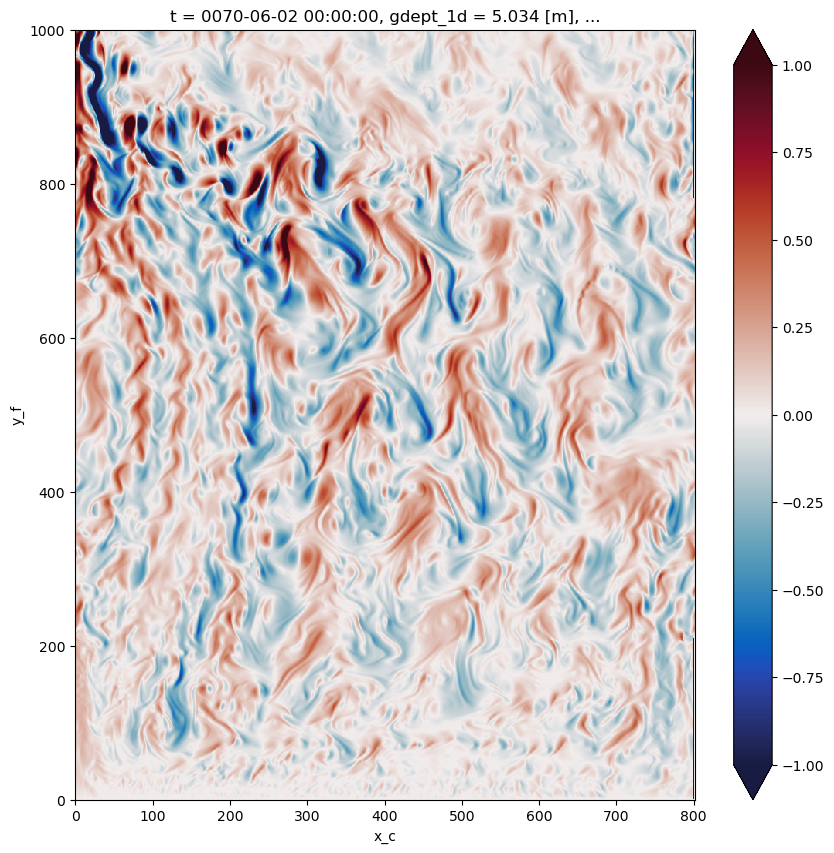

In [32]:
vg_v.isel(t=0, y_f=slice(0,1000)).plot(vmin=-1, vmax=1,
       figsize=(10,10),
       cmap=cmocean.cm.balance,
       )

In [44]:
psi = -grid.cumint(ug_u, 'Y')
psi

<xarray.DataArray (y_f: 3183, x_f: 802, t: 30)>
dask.array<neg, shape=(3183, 802, 30), dtype=float64, chunksize=(135, 206, 1), chunktype=numpy.ndarray>
Coordinates:
  * t        (t) object 0070-06-02 00:00:00 ... 0070-07-01 00:00:00
  * x_f      (x_f) float64 0.5 1.5 2.5 3.5 4.5 ... 797.5 798.5 799.5 800.5 801.5
  * y_f      (y_f) float64 0.5 1.5 2.5 3.5 ... 3.18e+03 3.182e+03 3.182e+03

In [45]:
psi_new = xr.where(ds.gphif>0, 0.0, psi)
psi_new

<xarray.DataArray (y_f: 3183, x_f: 802, t: 30)>
dask.array<where, shape=(3183, 802, 30), dtype=float64, chunksize=(135, 206, 1), chunktype=numpy.ndarray>
Coordinates:
    glamf    (y_f, x_f) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
    gphif    (y_f, x_f) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
  * x_f      (x_f) float64 0.5 1.5 2.5 3.5 4.5 ... 797.5 798.5 799.5 800.5 801.5
  * y_f      (y_f) float64 0.5 1.5 2.5 3.5 ... 3.18e+03 3.182e+03 3.182e+03
  * t        (t) object 0070-06-02 00:00:00 ... 0070-07-01 00:00:00

In [51]:
psi_t = grid.interp(psi_new, ['X', 'Y']) * ds.tmask.isel(z_c=0)
psi_t

/home/users/twilder/Python/pyCDFTOOLS/lib/python3.12/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(
/home/users/twilder/Python/pyCDFTOOLS/lib/python3.12/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


<xarray.DataArray (y_c: 3183, x_c: 802, t: 30)>
dask.array<mul, shape=(3183, 802, 30), dtype=float64, chunksize=(135, 206, 1), chunktype=numpy.ndarray>
Coordinates:
  * t         (t) object 0070-06-02 00:00:00 ... 0070-07-01 00:00:00
  * x_c       (x_c) int64 0 1 2 3 4 5 6 7 8 ... 794 795 796 797 798 799 800 801
  * y_c       (y_c) int64 0 1 2 3 4 5 6 7 ... 3176 3177 3178 3179 3180 3181 3182
    gdept_1d  float64 dask.array<chunksize=(), meta=np.ndarray>
    z_c       int64 0
    glamt     (y_c, x_c) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
    gphit     (y_c, x_c) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
    gdept_0   (y_c, x_c) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>

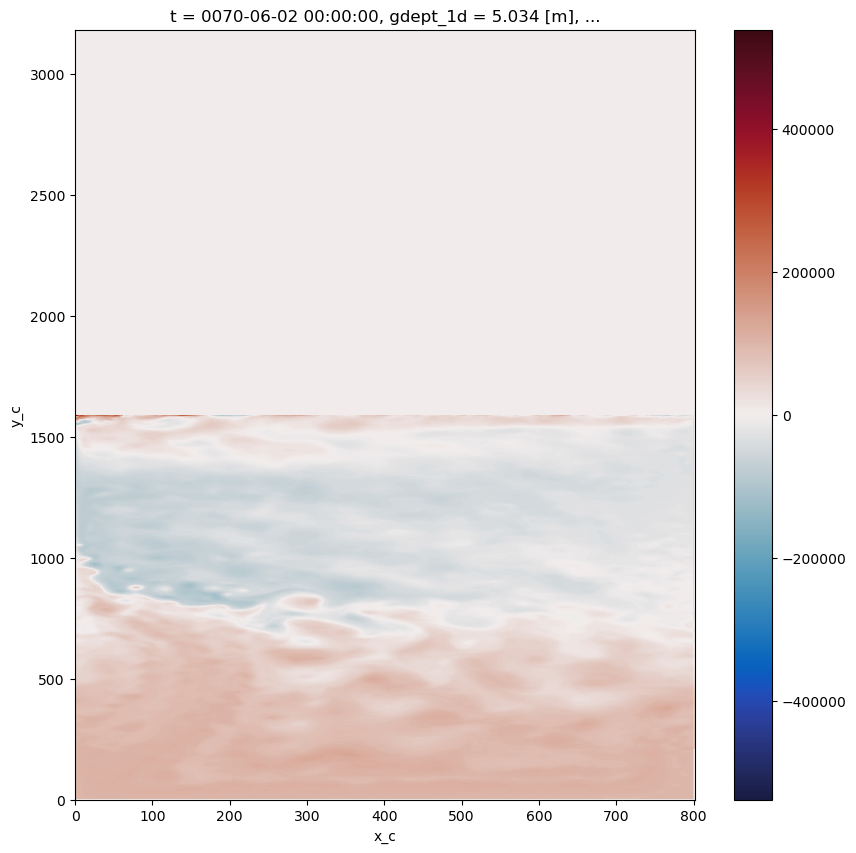

In [52]:
psi_t.isel(t=0).plot.pcolormesh(
    figsize=(10,10), 
    cmap=cmocean.cm.balance)

In [43]:
psi_new = xr.where(psi.isnull(), 0.0, psi)